In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
import seaborn as sns

# Functions

In [2]:
def sti_vector(vec_inf, vec_sup):
    return np.append(-vec_inf, vec_sup)

In [3]:
def back_sti_vector(sti_vec):  
    mid_idx = sti_vec.shape[0] // 2
    return -sti_vec[:mid_idx], sti_vec[mid_idx:]

In [4]:
def sti_dot_mtx(matrix):
    pos = matrix.copy()
    neg = matrix.copy()
    pos[pos < 0] = 0
    neg[neg > 0] = 0
    neg = np.fabs(neg)
    return np.block([[pos, neg], [neg, pos]])

In [5]:
def diagonal_dominant(matrix):
    D = np.diag(np.abs(matrix))
    E = np.sum(np.abs(matrix), axis=1) - D 
    return np.all(D > E)


def make_diagonal_dominant(matrix):
    if diagonal_dominant(matrix):
        return matrix
    D = np.diag(np.abs(matrix))
    E = np.sum(np.abs(matrix), axis=1) - D 
    eps = 0.1
    for i in range(matrix.shape[0]):
        if D[i] - E[i] <= eps:
            matrix[i,i] += E[i] - D[i] + eps
    return matrix

In [6]:
def solve(A, b_inf, b_sup):
    sti_vec = sti_vector(b_inf, b_sup)
    
    A_block = sti_dot_mtx(A)
    
    res = np.dot(np.linalg.inv(A_block), sti_vec)
    
    x_inf, x_sup = back_sti_vector(res)

    return x_inf, x_sup

In [7]:
def heatMap(matrix, annot=False):
    div = np.max(np.fabs(matrix))
    plt.figure(figsize=(10,8))
    sns.heatmap(matrix, annot=annot, center=0)
    plt.title('Matrix coef')
    plt.xlabel('column')
    plt.ylabel('row')
    plt.show()

In [8]:
def graphs(x, x_inf, x_sup):
    plt.figure(figsize=(18, 8))
    plt.plot(x, label='true')
    plt.plot(x_inf, label='x_inf')
    plt.plot(x_sup, label='x_sup')
    plt.xlabel('x_index')
    plt.ylabel('value')
    plt.title('Сравнение решения с исходными значениями')
    plt.legend()
    plt.grid()
    plt.show()

# Task 1

In [9]:
A = np.array([[1 , 1],
             [0, 0.1]])

b_inf = np.array([4.1, 0.1])
b_sup = np.array([3.9, 0.3])

In [10]:
x_inf, x_sup = solve(A, b_inf, b_sup)

In [11]:
np.array((x_inf, x_sup)).T

array([[3.1, 0.9],
       [1. , 3. ]])

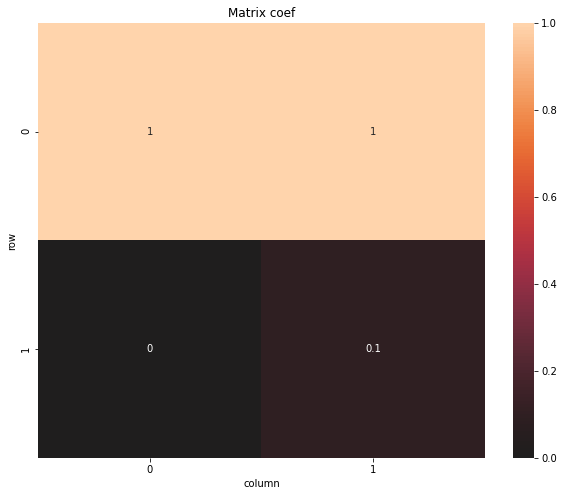

In [12]:
heatMap(A, True)

# Task 2

In [13]:
def get_square(matrix):
    result_n = min(matrix.shape[0], matrix.shape[1])
    return matrix[:result_n,:result_n]

In [14]:
def generate_right_part(matrix):
    n = matrix.shape[0]
    x = np.random.uniform(low=1, high=5, size=n)
    b = np.dot(matrix, x)  # get right part
    rads = np.random.uniform(low=0.5, high=2, size=n)  # generate radiuses for b
    b_inf = b - rads  # make b interval
    b_sup = b + rads
    return b_inf, b_sup, x

In [15]:
inputs = ['matrix_n_phi_1.txt',
         'matrix_n_phi_6.txt']

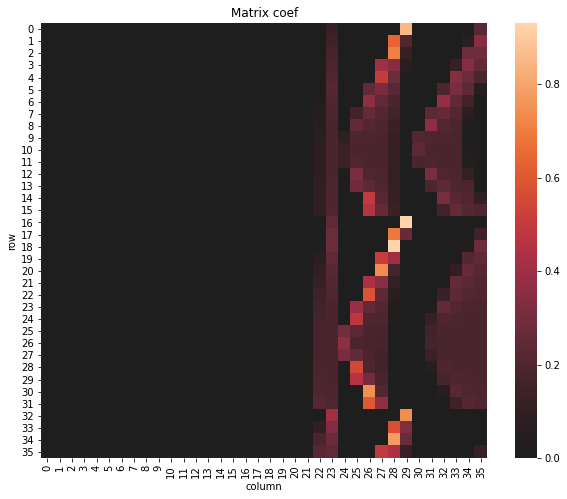

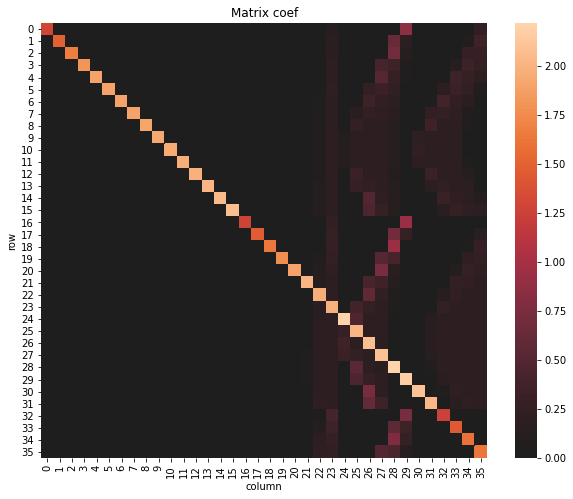

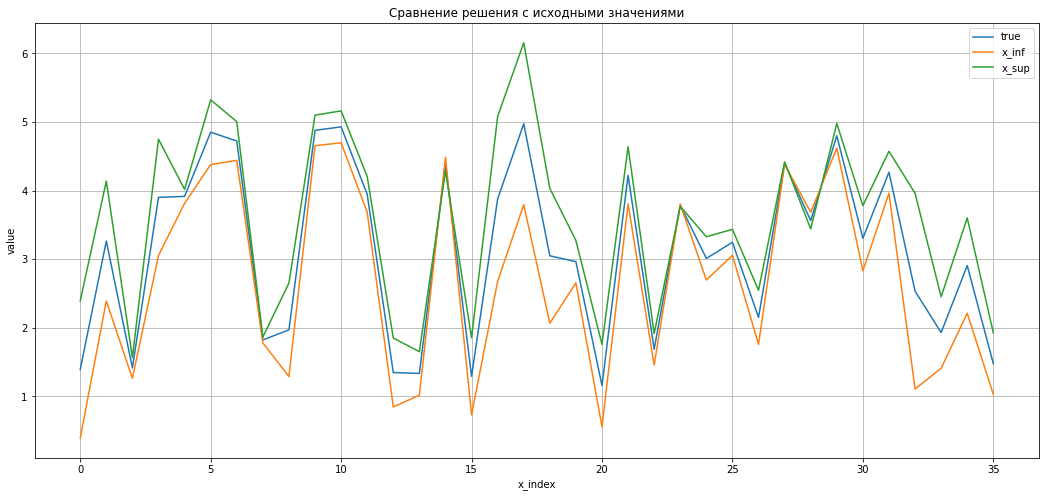

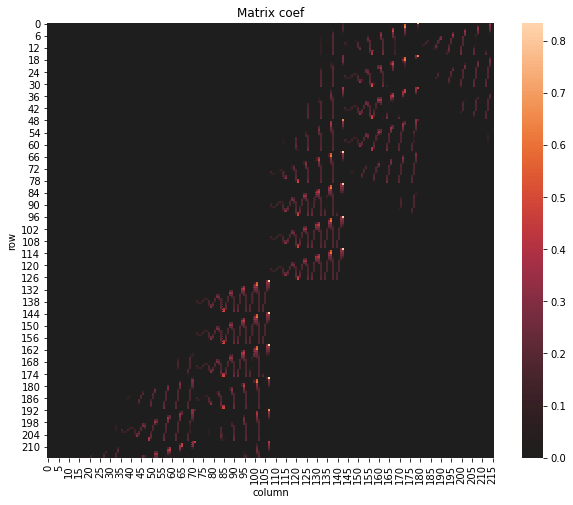

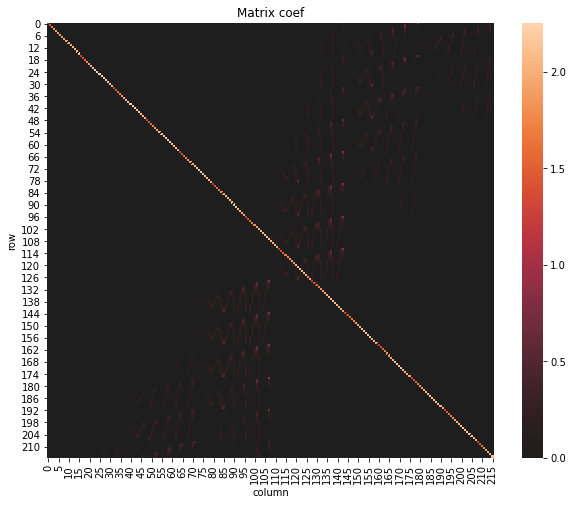

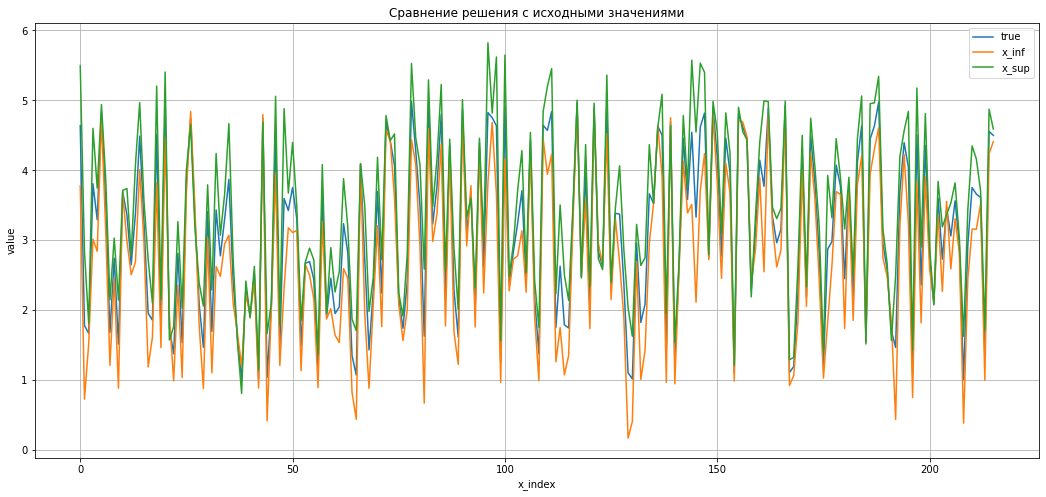

In [16]:
result = []
for file in inputs:
    A = np.loadtxt(file)
    A = get_square(A)
    heatMap(A)
    A = make_diagonal_dominant(A)
    
    b_inf, b_sup, x = generate_right_part(A)

    
    x_inf, x_sup = (solve(A, b_inf, b_sup))
    
    heatMap(A)
    
    graphs(x, x_inf, x_sup)

# Task 3

In [17]:
def find_matrix(matrix, size):
    M = matrix
    indexes = []

    for i, col in enumerate(M.T):
        if np.fabs(col).sum() > 0:
            indexes.append(i)
    M = M.T[indexes].T

    size = min(M.shape[0], M.shape[1], size)
    
    while size > 0:
        s = 0
        for i in range(M.shape[0] - size + 1):
            s = 0
            for j in range(M.shape[1] - size + 1):
                s = 0
                if np.linalg.matrix_rank(M[i:i+size, j:j+size]) == size:
                    print(j)
                    break

                s+=1
                #for col in M[i:i+size, j:j+size].T:
                    #if (np.fabs(col).sum() < 0.2): #or (np.fabs(col.T).sum() < 0.1) :
                        #s+=1
                        #break


                #if s == 0:
                    #print(j)
                    #break

            if s == 0:
                print(i)
                break


        if s == 0:
            print(size)
            break

        size -=1
    
    return M[i:i+size, j:j+size], i
            

In [18]:
def graphs2(x, x_sup, x_inf, A, b_inf, b_sup):
    plt.figure(figsize=(18, 8))
    plt.plot(np.dot(A, x_inf), label='A * x_inf')
    plt.plot(np.dot(A, x_sup), label='A * x_sup')
    plt.plot(np.dot(A, x), label='b_true')
    plt.plot(b_inf, label='b_inf', ls='--')
    plt.plot(b_sup, label='b_sup', ls='--')
    plt.legend()
    plt.title('Results')
    plt.grid()
    plt.show()

In [19]:
def solve2(matrix, size=25):
    
    A, row = find_matrix(matrix, size)

    
    heatMap(A)
    
    b_inf, b_sup, x = generate_right_part(A)

    
    x_inf, x_sup = (solve(A, b_inf, b_sup))
    
    graphs(x, x_inf, x_sup)
    
    graphs2(x, x_sup, x_inf, A, b_inf, b_sup)

101
90
20


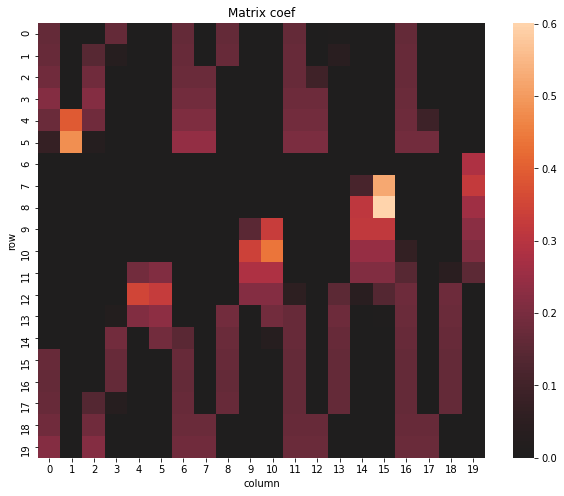

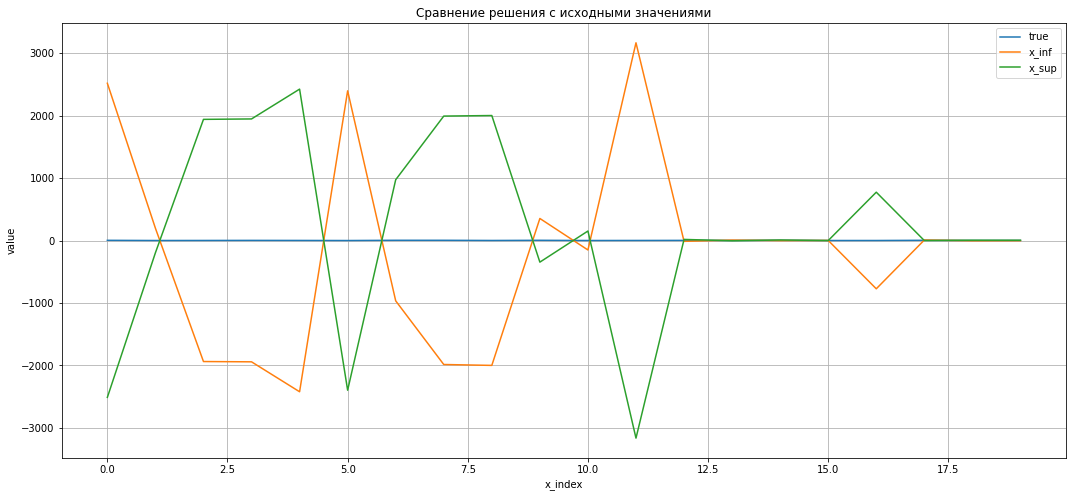

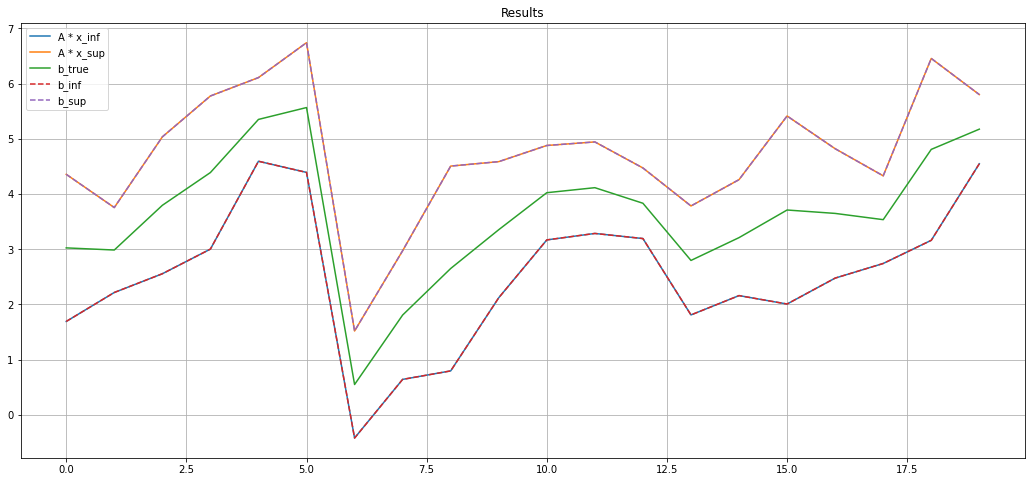

In [20]:
A = np.loadtxt(inputs[1])
solve2(A)

In [21]:
A = np.loadtxt(inputs[0])

22
0
14


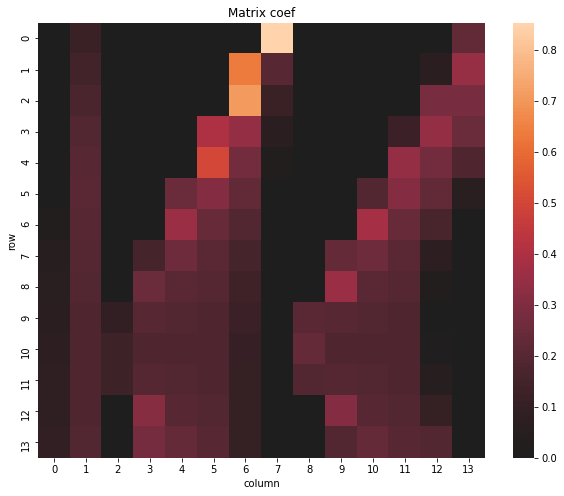

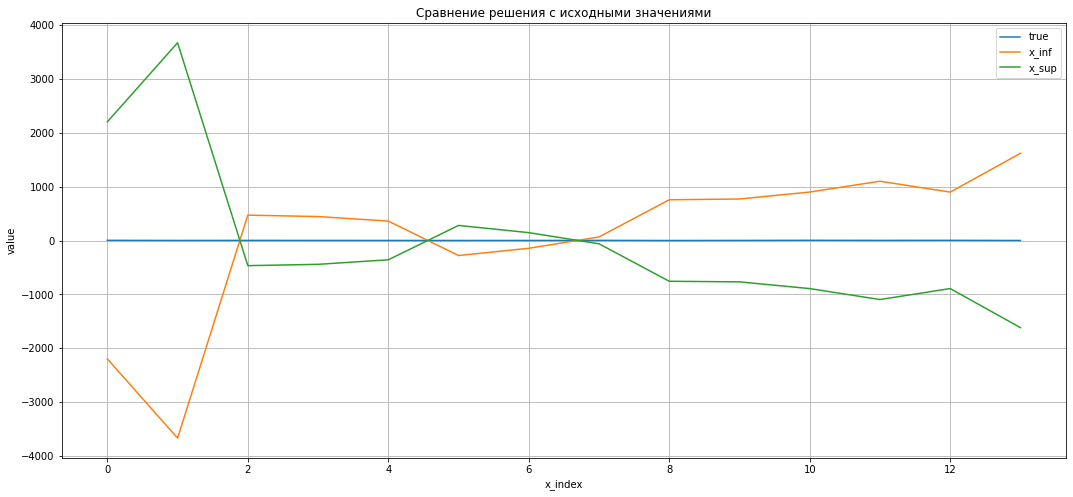

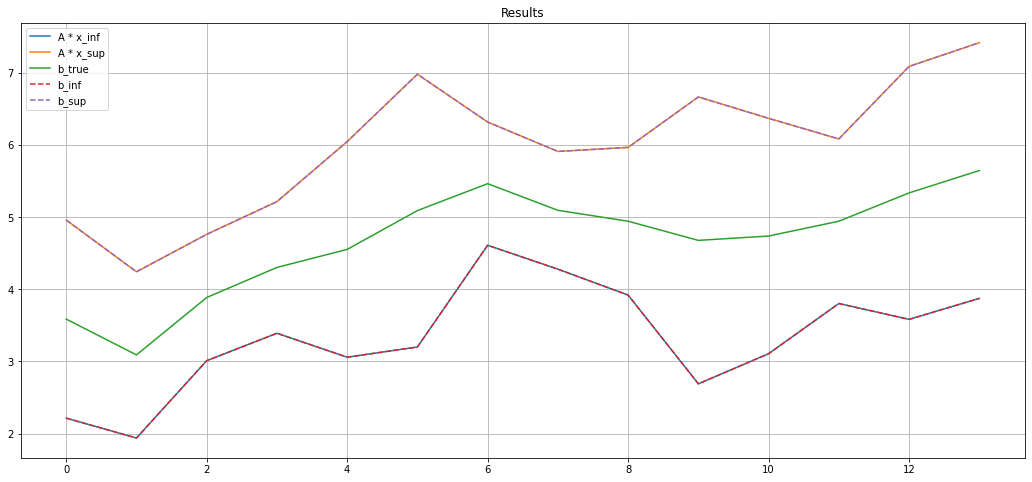

In [22]:
solve2(A, 15)

# Task4

In [23]:
def read_right_part(path='b25636.txt'):
    b_new = np.loadtxt(path)
    return b_new

In [24]:
def interval_right_part(b):
    n = b.shape[0]
    rads = np.random.uniform(low=0.5, high=2, size=n)  # generate radiuses for b
    b_inf = b - rads  # make b interval
    b_sup = b + rads
    return b_inf, b_sup

In [40]:
def graphs3(b, x_sup, x_inf, A, b_inf, b_sup):
    plt.figure(figsize=(18, 8))
    plt.plot(np.dot(A, x_inf), label='A * x_inf')
    plt.plot(np.dot(A, x_sup), label='A * x_sup')
    plt.plot(b, label='b_true')
    plt.plot(b_inf, label='b_inf', ls='--')
    plt.plot(b_sup, label='b_sup', ls='--')
    
    plt.legend()
    plt.title('Results')
    plt.grid()
    plt.show()

In [41]:
def solve3(matrix, size=25):
    
    A, row = find_matrix(matrix, size)

    heatMap(A)
    
    b = read_right_part()
    
    b = b[row:row+A.shape[0]]
    
    b_inf, b_sup = interval_right_part(b)

    
    x_inf, x_sup = (solve(A, b_inf, b_sup))
    
    #graphs(x, x_inf, x_sup)
    
    graphs3(b, x_sup, x_inf, A, b_inf, b_sup)

22
0
14


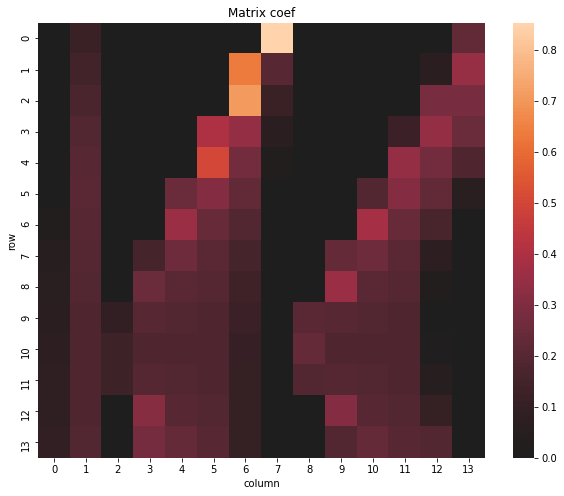

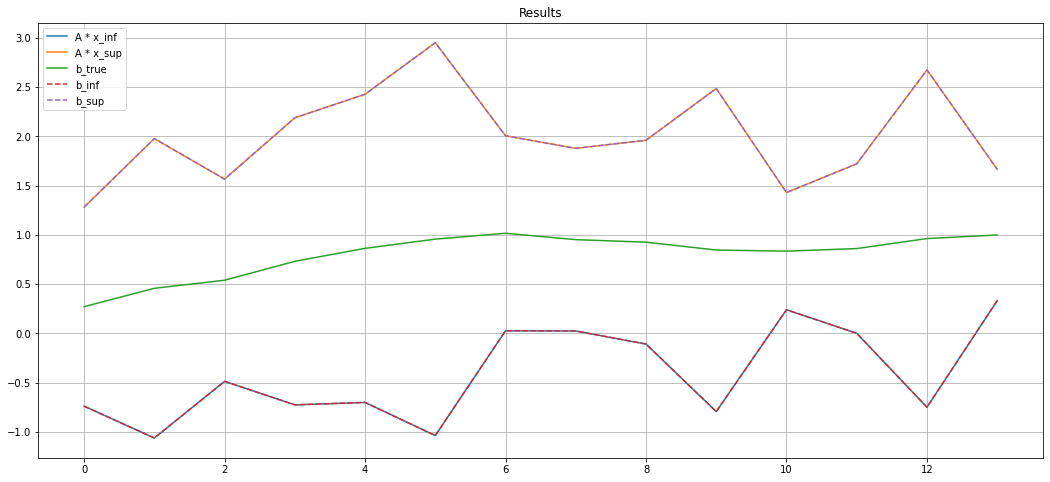

In [42]:
A = np.loadtxt(inputs[0])
solve3(A)

101
90
20


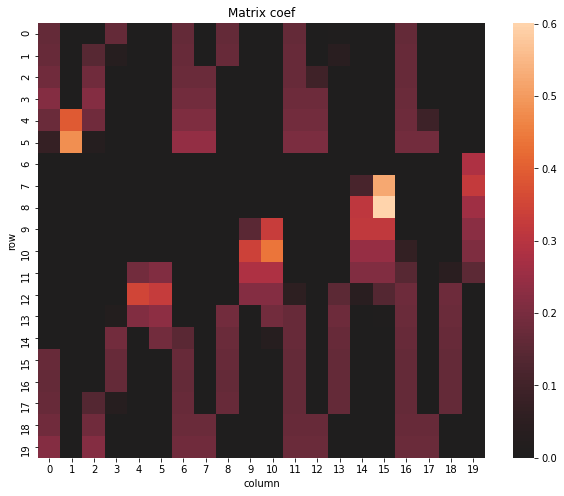

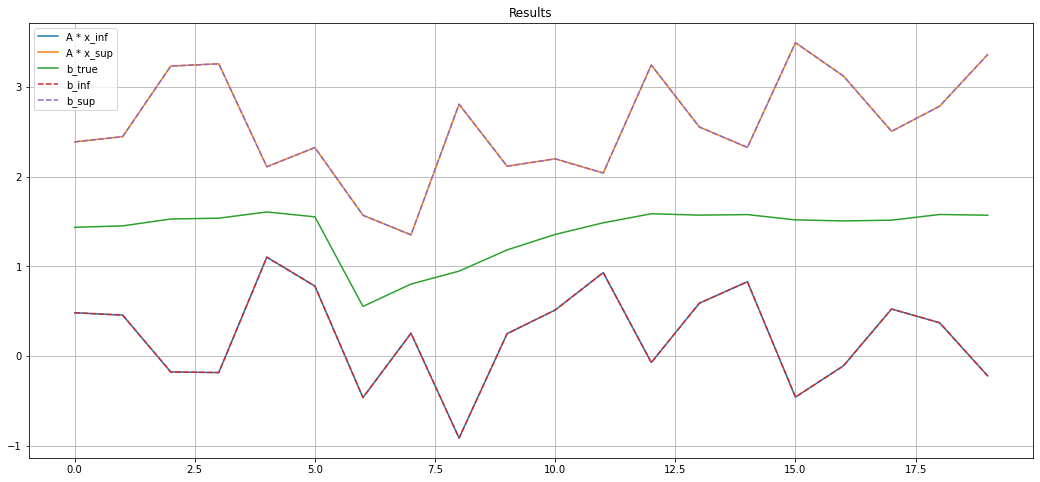

In [43]:
A = np.loadtxt(inputs[1])
solve3(A)